In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()

In [5]:
#importing the Tesla Stock Dataset
tesla_stockdata = pd.read_csv('D:\\kaggle\\TeslaStockData\\TSLA.csv')
tesla_stockdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [6]:
tesla_stockdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
Date         2416 non-null object
Open         2416 non-null float64
High         2416 non-null float64
Low          2416 non-null float64
Close        2416 non-null float64
Adj Close    2416 non-null float64
Volume       2416 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [7]:
tesla_stockdata.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
tesla_stockdata.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [9]:
tesla_stockdata['Date'] = pd.to_datetime(tesla_stockdata['Date'])
tesla_stockdata.set_index("Date", inplace = True)

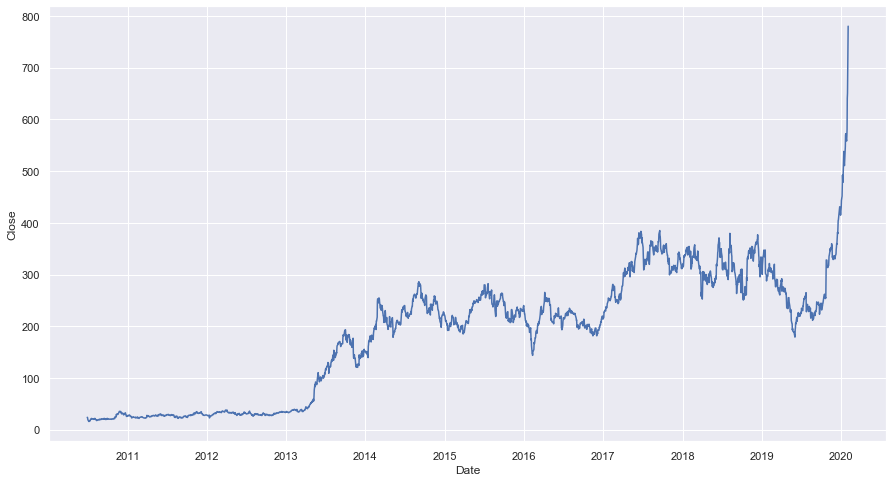

In [14]:
plt.figure(figsize=(15,8))
sns.lineplot(tesla_stockdata.index,tesla_stockdata['Close'])

In [15]:
tesla_stockdata['Daily Lag'] = tesla_stockdata['Close'].shift(1)
tesla_stockdata.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Lag
Date,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,NaN
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,23.889999
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,23.830000
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,21.959999
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,19.200001


In [16]:
tesla_stockdata['Daily Returns'] = (tesla_stockdata['Daily Lag']/tesla_stockdata['Close']) -1
tesla_stockdata.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns
Date,,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,NaN,NaN
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,23.889999,0.002518
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,23.830000,0.085155
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,21.959999,0.143750
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,19.200001,0.191806


In [17]:
tesla_stockdata.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03,2415.000000,2415.000000
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06,186.157855,-0.000915
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06,118.546390,0.032459
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05,15.800000,-0.196110
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06,34.400002,-0.017792
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06,212.960007,-0.000869
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06,266.724991,0.014382
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07,650.570007,0.239579


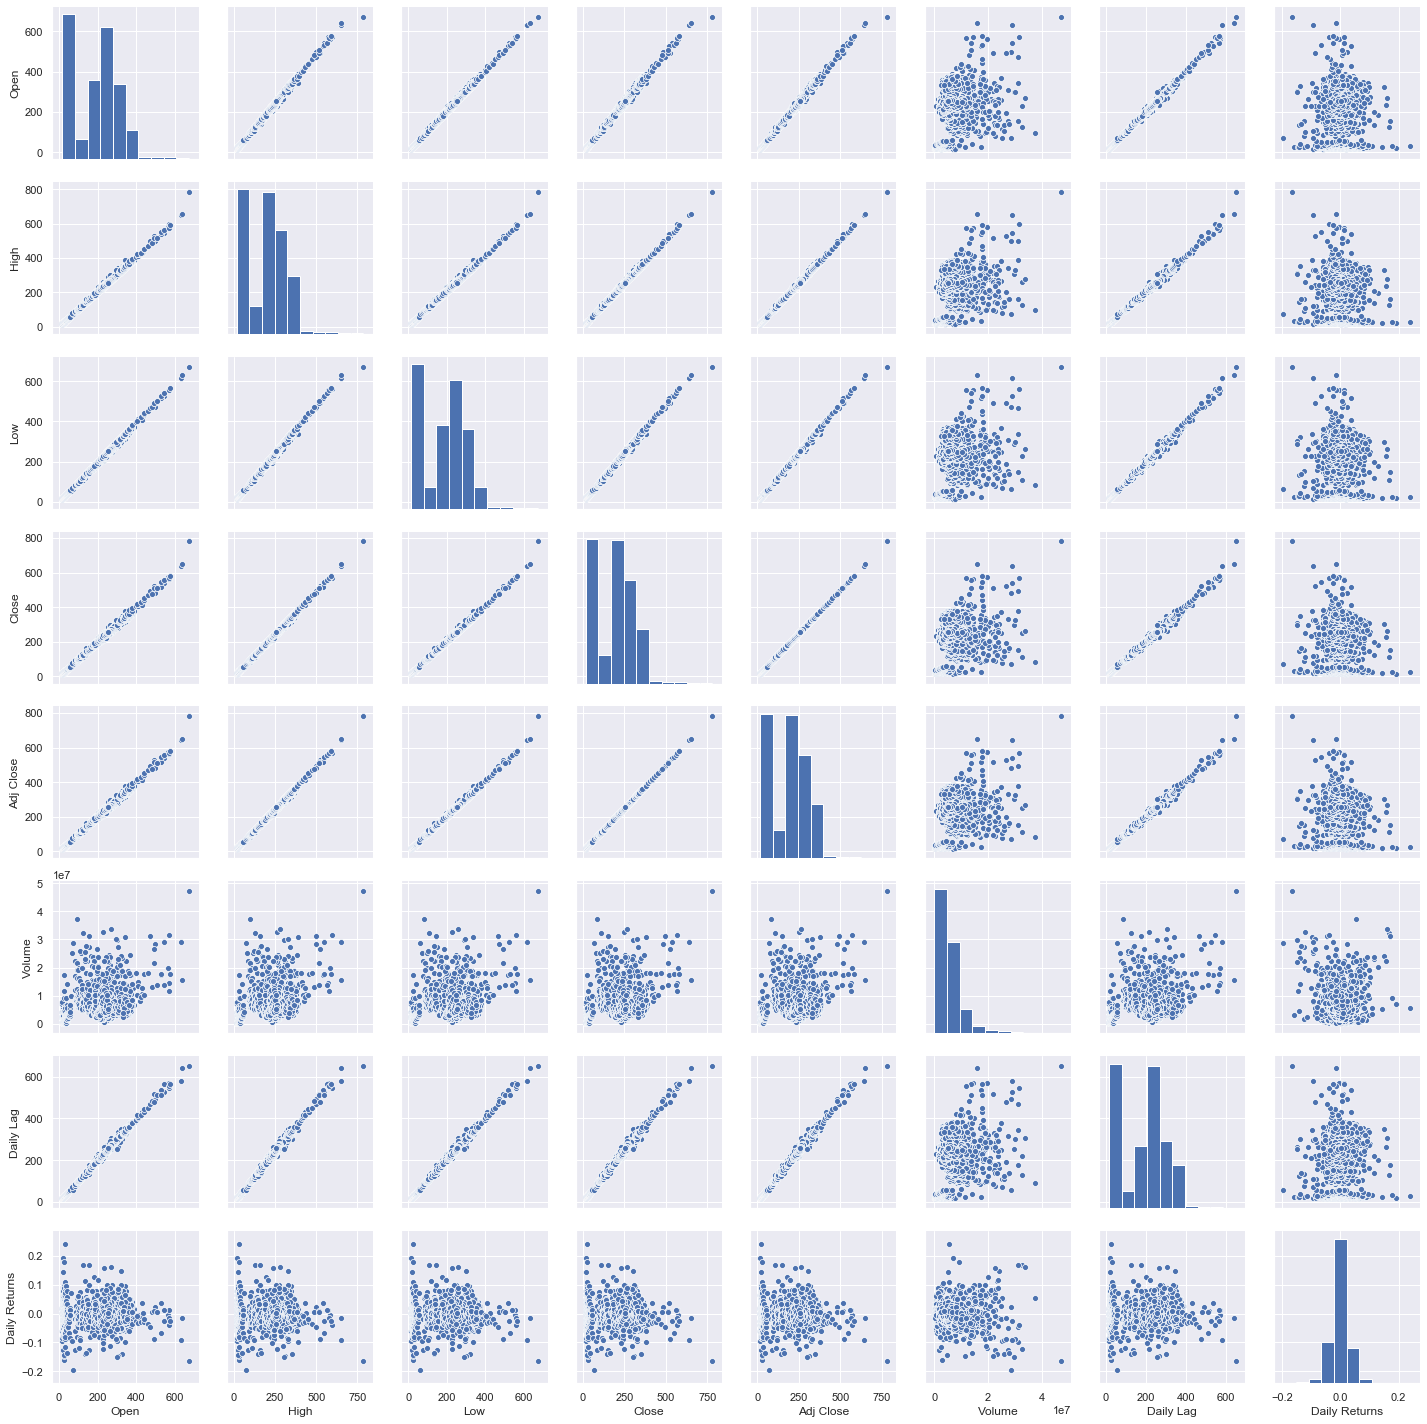

In [18]:
sns.pairplot(tesla_stockdata[1:])

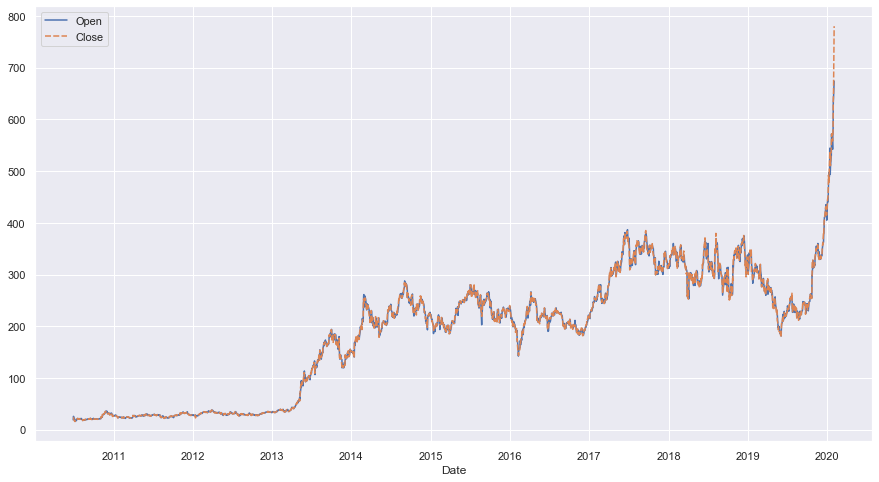

In [19]:
stocks = pd.DataFrame({'Open':tesla_stockdata['Open'],'Close':tesla_stockdata['Close']})
plt.figure(figsize=(15,8))
sns.lineplot(data=stocks)

In [21]:
# Comparing Tesla Stock data with competitor vehicle manufacturer 
# like General Motors (US company) and Volkswagen (Foreign)
import pandas_datareader as web
import datetime
 
# We will look at stock prices over the past year, starting at JUne 30, 2010
start = datetime.datetime(2010,6,30)
end = datetime.datetime(2020,2,3)

# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
volkswagen_stockdata = web.DataReader("VWAGY", "yahoo", start, end)
generalmotors_stockdata = web.DataReader("GM", "yahoo", start, end)

In [22]:
volkswagen_stockdata.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,8.645,8.485,8.525,8.575,35334.0,6.124079
2010-06-30,8.675,8.525,8.595,8.575,15054.0,6.124079
2010-07-01,8.700,8.515,8.690,8.700,39376.0,6.213351
2010-07-02,8.725,8.530,8.575,8.650,9330.0,6.177642
2010-07-06,8.850,8.700,8.700,8.775,13084.0,6.266915


In [23]:
generalmotors_stockdata.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-11-18,35.990002,33.889999,35.000000,34.189999,457044300.0,26.474590
2010-11-19,34.500000,33.110001,34.150002,34.259998,107842000.0,26.528797
2010-11-22,34.480000,33.810001,34.200001,34.080002,36650600.0,26.389408
2010-11-23,33.990002,33.189999,33.950001,33.250000,31170200.0,25.746712
2010-11-24,33.799999,33.220001,33.730000,33.480000,26138000.0,25.924818


In [24]:
volkswagen_stockdata['Daily Lag'] = volkswagen_stockdata['Close'].shift(1)
volkswagen_stockdata['Daily Returns'] = (volkswagen_stockdata['Daily Lag']/volkswagen_stockdata['Close']) -1
volkswagen_stockdata.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Lag,Daily Returns
Date,,,,,,,,
2010-06-29,8.645,8.485,8.525,8.575,35334.0,6.124079,NaN,NaN
2010-06-30,8.675,8.525,8.595,8.575,15054.0,6.124079,8.575,0.000000
2010-07-01,8.700,8.515,8.690,8.700,39376.0,6.213351,8.575,-0.014368
2010-07-02,8.725,8.530,8.575,8.650,9330.0,6.177642,8.700,0.005780
2010-07-06,8.850,8.700,8.700,8.775,13084.0,6.266915,8.650,-0.014245


In [25]:
generalmotors_stockdata['Daily Lag'] = generalmotors_stockdata['Close'].shift(1)
generalmotors_stockdata['Daily Returns'] = (generalmotors_stockdata['Daily Lag']/generalmotors_stockdata['Close']) -1
generalmotors_stockdata.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Lag,Daily Returns
Date,,,,,,,,
2010-11-18,35.990002,33.889999,35.000000,34.189999,457044300.0,26.474590,NaN,NaN
2010-11-19,34.500000,33.110001,34.150002,34.259998,107842000.0,26.528797,34.189999,-0.002043
2010-11-22,34.480000,33.810001,34.200001,34.080002,36650600.0,26.389408,34.259998,0.005282
2010-11-23,33.990002,33.189999,33.950001,33.250000,31170200.0,25.746712,34.080002,0.024962
2010-11-24,33.799999,33.220001,33.730000,33.480000,26138000.0,25.924818,33.250000,-0.006870


In [26]:
volkswagen_stockdata.describe()

,High,Low,Open,Close,Volume,Adj Close,Daily Lag,Daily Returns
count,2415.000000,2415.000000,2415.000000,2415.000000,2.415000e+03,2415.000000,2414.000000,2414.000000
mean,18.147444,17.878525,18.020499,18.022319,2.760496e+05,15.537256,18.022287,-0.000109
std,3.987738,3.974124,3.975573,3.985333,7.102040e+05,3.764360,3.986158,0.020143
min,8.645000,8.485000,8.525000,8.575000,0.000000e+00,6.124079,8.575000,-0.093415
25%,15.306100,15.070000,15.197500,15.175000,7.757650e+04,12.684289,15.175000,-0.010703
50%,17.059999,16.825001,16.969999,16.967501,1.380980e+05,15.715919,16.964750,-0.000240
75%,20.922500,20.584999,20.759999,20.752501,2.653210e+05,18.606880,20.756250,0.010274
max,27.440001,27.125000,27.225000,27.410000,1.719334e+07,23.167992,27.410000,0.206312


In [27]:
generalmotors_stockdata.describe()

,High,Low,Open,Close,Volume,Adj Close,Daily Lag,Daily Returns
count,2316.000000,2316.000000,2316.000000,2316.000000,2.316000e+03,2316.000000,2315.000000,2315.000000
mean,33.557042,32.834059,33.217923,33.196921,1.366825e+07,28.248201,33.196695,0.000163
std,5.535054,5.516697,5.532497,5.521155,1.206882e+07,6.376283,5.522337,0.017742
min,19.129999,18.719999,19.020000,18.799999,2.757600e+06,14.557546,18.799999,-0.114051
25%,30.790001,30.057499,30.397500,30.427500,8.821275e+06,24.502150,30.415000,-0.009315
50%,34.689999,33.970001,34.390001,34.355000,1.159805e+07,27.910990,34.360001,-0.000325
75%,37.180000,36.470001,36.842500,36.832501,1.553635e+07,32.765750,36.835001,0.009247
max,46.759998,45.720001,45.910000,46.480000,4.570443e+08,42.464954,46.480000,0.122367


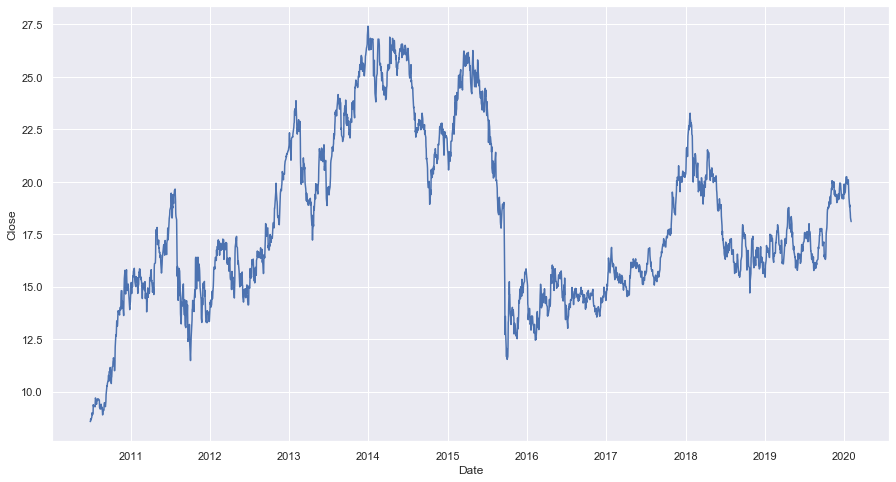

In [28]:
plt.figure(figsize=(15,8))
sns.lineplot(volkswagen_stockdata.index,volkswagen_stockdata['Close'])

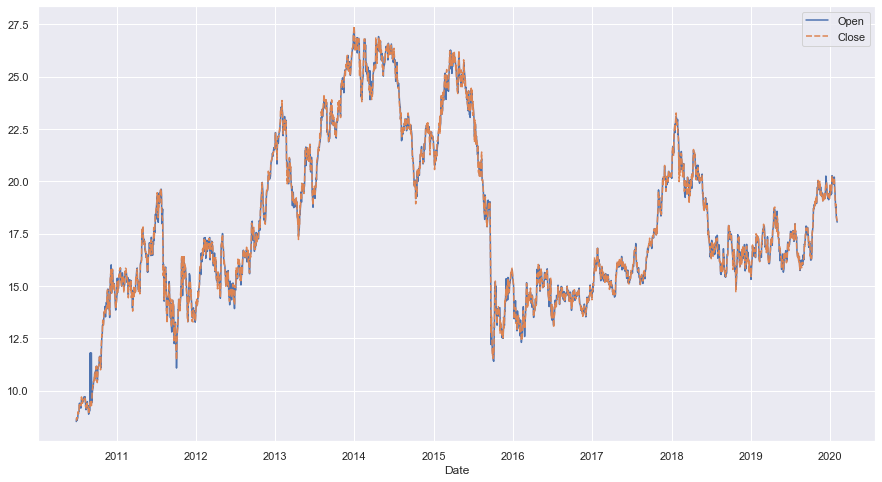

In [29]:
stocks = pd.DataFrame({'Open':volkswagen_stockdata['Open'],'Close':volkswagen_stockdata['Close']})
plt.figure(figsize=(15,8))
sns.lineplot(data=stocks)

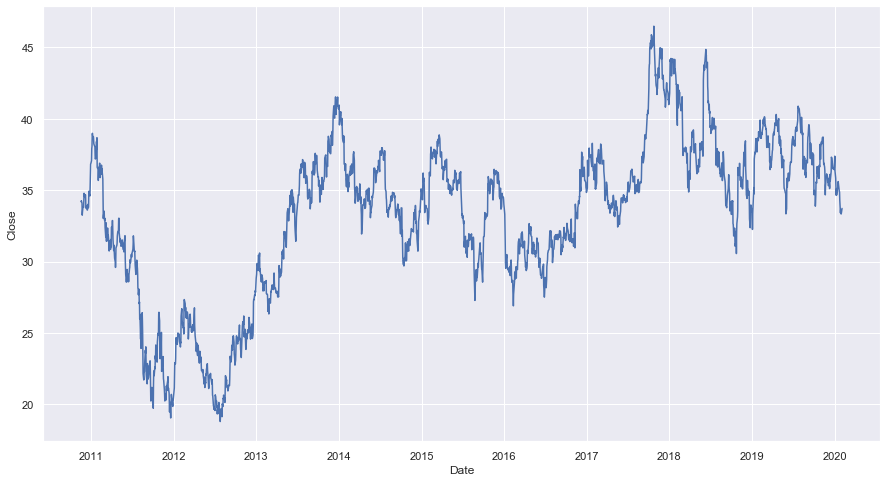

In [30]:
plt.figure(figsize=(15,8))
sns.lineplot(generalmotors_stockdata.index,generalmotors_stockdata['Close'])

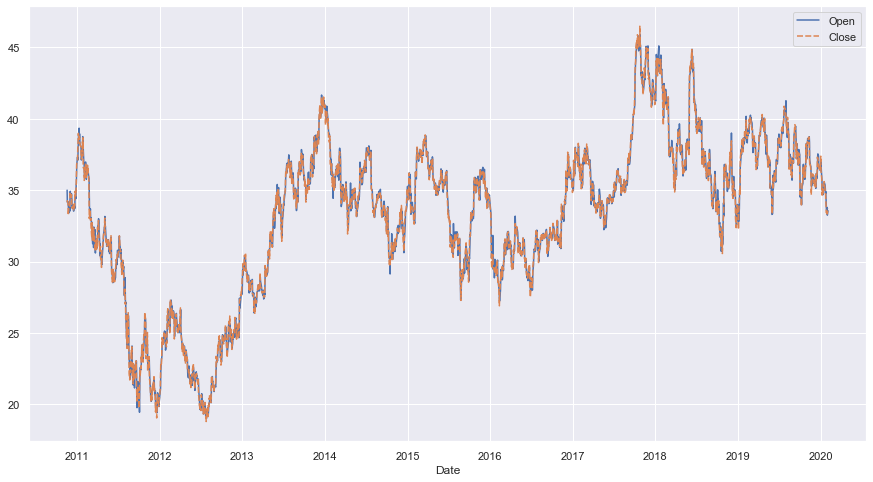

In [31]:
stocks = pd.DataFrame({'Open':generalmotors_stockdata['Open'],'Close':generalmotors_stockdata['Close']})
plt.figure(figsize=(15,8))
sns.lineplot(data=stocks)

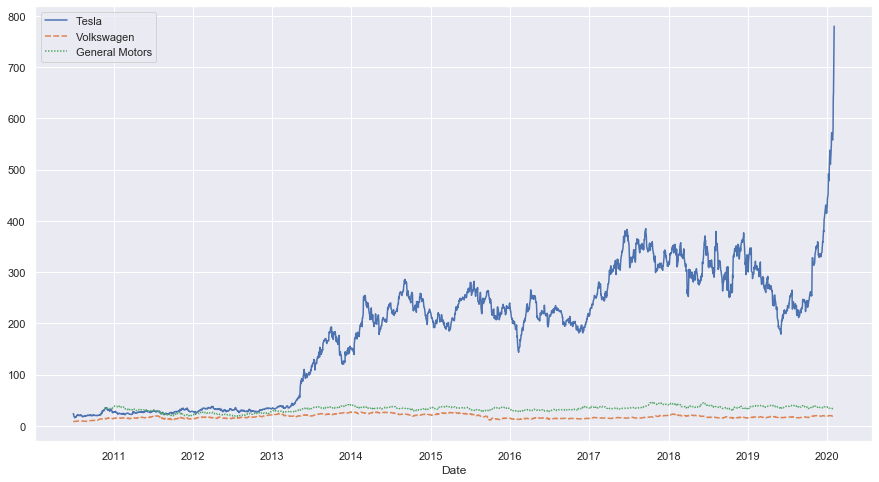

In [32]:
stocks = pd.DataFrame({'Tesla':tesla_stockdata['Close'],'Volkswagen':volkswagen_stockdata['Close'],
                       'General Motors':generalmotors_stockdata['Close']})
plt.figure(figsize=(15,8))
sns.lineplot(data=stocks)

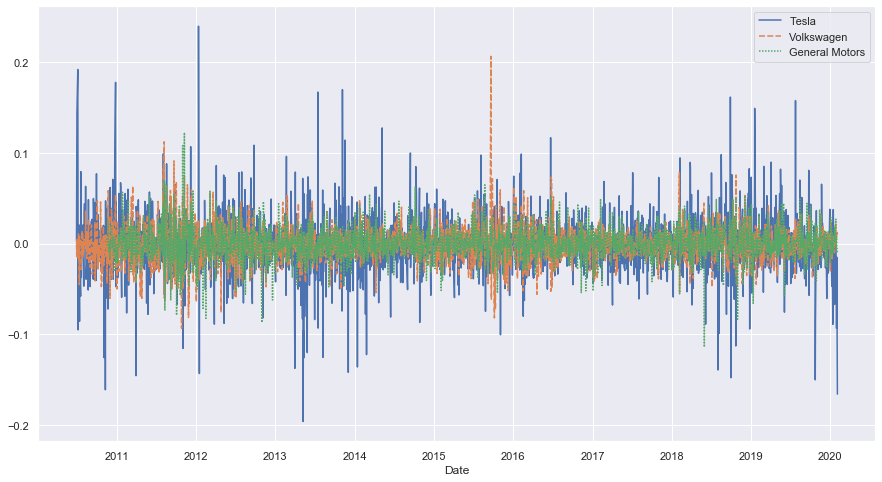

In [33]:
stocks = pd.DataFrame({'Tesla':tesla_stockdata['Daily Returns'],'Volkswagen':volkswagen_stockdata['Daily Returns'],
                       'General Motors':generalmotors_stockdata['Daily Returns']})
plt.figure(figsize=(15,8))
sns.lineplot(data=stocks)